1. 

En el archivo "logistic_regression_digits" hemos visto un ejemplo multiclase. Elimina todas las imágenes y etiqueta (label) cuyo valor del label no sea 1 o 9. Es decir, elimina todos los dígitos y quédate solo con los dígitos 1 y 9.

Ahora, realiza un entrenamiento con logistic regression con los nuevos datos:

- ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (toca, modifica, prueba) las variables y comenta si hay alguna de ellas que, modificándola, mejore el porcentaje de acierto del problema.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [81]:
#import modules
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV #Grid_Search_Cross_Validation

%matplotlib inline

In [4]:
from sklearn.datasets import load_digits
digits = load_digits() # 8x8 = 64 pixels  -- Very clean Dataset 

In [8]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [15]:
digits['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [16]:
digits['target']

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [13]:
df = pd.DataFrame(data= np.c_[digits['data'], digits['target']]) # une el target, añade columnas en el último eje del tamaño del primer argumento
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9.0


In [14]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [20]:
df = df[(df[64] == 1.0) | (df[64] == 9.0)]

In [21]:
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9.0
11,0.0,0.0,0.0,0.0,14.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,13.0,16.0,1.0,0.0,1.0
19,0.0,0.0,6.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,7.0,16.0,16.0,13.0,11.0,1.0,9.0
21,0.0,0.0,0.0,2.0,16.0,16.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,12.0,15.0,4.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,0.0,0.0,5.0,14.0,11.0,8.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,7.0,15.0,12.0,5.0,0.0,0.0,9.0
1774,0.0,0.0,6.0,12.0,12.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,11.0,10.0,4.0,0.0,0.0,1.0
1786,0.0,0.0,4.0,14.0,15.0,6.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,4.0,13.0,15.0,9.0,0.0,0.0,9.0
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0


In [22]:
X = np.array(df.iloc[:,:64])
X

array([[ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0., 11., ...,  3.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  1.,  0.],
       ...,
       [ 0.,  0.,  4., ...,  9.,  0.,  0.],
       [ 0.,  0.,  4., ...,  9.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.]])

In [23]:
y = np.array(df.iloc[:,64])
y

array([1., 9., 1., 9., 1., 9., 9., 9., 9., 1., 1., 1., 9., 1., 9., 1., 1.,
       1., 9., 1., 1., 9., 1., 9., 9., 9., 1., 9., 1., 9., 1., 9., 9., 9.,
       9., 1., 1., 1., 9., 1., 9., 1., 1., 1., 9., 1., 1., 9., 1., 9., 9.,
       1., 9., 1., 9., 1., 9., 9., 9., 9., 1., 1., 1., 9., 1., 9., 1., 1.,
       1., 9., 1., 1., 9., 1., 9., 9., 9., 1., 9., 1., 9., 1., 9., 9., 9.,
       9., 1., 1., 1., 9., 1., 9., 1., 1., 1., 9., 1., 1., 9., 1., 9., 9.,
       9., 1., 9., 1., 9., 1., 9., 9., 9., 9., 1., 1., 1., 9., 1., 9., 1.,
       1., 1., 9., 1., 1., 9., 1., 9., 9., 9., 1., 9., 1., 9., 1., 9., 9.,
       9., 9., 1., 1., 1., 9., 1., 9., 1., 1., 1., 9., 1., 1., 9., 1., 9.,
       9., 9., 1., 9., 1., 9., 1., 9., 9., 9., 9., 1., 1., 1., 9., 1., 9.,
       1., 1., 1., 9., 1., 1., 9., 1., 9., 9., 9., 1., 9., 1., 9., 1., 9.,
       9., 9., 9., 1., 1., 1., 9., 1., 9., 1., 1., 1., 9., 1., 1., 9., 1.,
       9., 9., 9., 1., 9., 1., 9., 1., 9., 9., 9., 9., 1., 1., 1., 9., 1.,
       9., 1., 1., 1., 9.

In [25]:
print(X.shape)
print(y.shape)

(362, 64)
(362,)


In [136]:
#Train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .20, random_state = 42)

In [137]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))
#Las clases están balanceadas

{1.0: 145, 9.0: 144}

In [138]:
print(np.count_nonzero(y_train == 1)) # Otra forma de obtener el número de la clase
print(np.count_nonzero(y_train == 9))
len(y_train) - np.count_nonzero(y_train == 9)

145
144


145

135

In [139]:
#Model fit
log_reg = LogisticRegression(solver='liblinear', multi_class='auto')
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [140]:
predictions = log_reg.predict(X_test)
predictions

array([9., 9., 1., 9., 9., 9., 9., 1., 9., 9., 9., 1., 9., 1., 9., 9., 1.,
       1., 1., 9., 1., 1., 9., 9., 1., 1., 1., 1., 1., 1., 9., 9., 1., 1.,
       9., 1., 9., 1., 9., 9., 9., 1., 1., 9., 9., 1., 1., 9., 9., 1., 1.,
       9., 9., 1., 1., 1., 1., 9., 1., 1., 9., 9., 9., 1., 1., 1., 1., 9.,
       1., 9., 1., 9., 1.])

In [141]:
log_reg.score(X_test, y_test)

0.9863013698630136

In [142]:
score = accuracy_score(y_test,log_reg.predict(X_test))
score

0.9863013698630136

In [143]:
c_matrix = confusion_matrix(y_test, predictions)
c_matrix

array([[37,  0],
       [ 1, 35]], dtype=int64)

<AxesSubplot:>

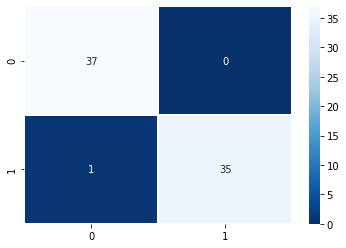

In [144]:
sns.heatmap(c_matrix, annot=True, linewidths=.5, cmap = 'Blues_r')

In [145]:
y_test

array([9., 9., 1., 9., 9., 9., 9., 1., 9., 9., 9., 1., 9., 1., 9., 9., 1.,
       1., 1., 9., 1., 1., 9., 9., 1., 1., 1., 1., 1., 1., 9., 9., 1., 1.,
       9., 1., 9., 1., 9., 9., 9., 1., 1., 9., 9., 1., 1., 9., 9., 1., 1.,
       9., 9., 1., 1., 9., 1., 9., 1., 1., 9., 9., 9., 1., 1., 1., 1., 9.,
       1., 9., 1., 9., 1.])

In [147]:
df_result = pd.DataFrame({'real': y_test,
                        'predictions': predictions})

In [148]:
df_result['success'] = df_result['real'] == df_result['predictions']

In [149]:
df_result

,real,predictions,success
0,9.0,9.0,True
1,9.0,9.0,True
2,1.0,1.0,True
3,9.0,9.0,True
4,9.0,9.0,True
...,...,...,...
68,1.0,1.0,True
69,9.0,9.0,True
70,1.0,1.0,True
71,9.0,9.0,True


In [150]:
error_digits = df_result[df_result['success'] == False]
error_digits

,real,predictions,success
55,9.0,1.0,False


[ 0.  0.  7. 15. 16. 12.  0.  0.  0. 12. 16. 11. 16. 13.  0.  0.  0. 15.
 16. 16. 14.  5.  0.  0.  0.  8. 16. 12.  0.  0.  0.  0.  0.  0.  2. 12.
  9.  0.  0.  0.  0.  0.  0.  9. 13.  0.  0.  0.  0.  0.  2. 16.  8.  0.
  0.  0.  0.  0. 10. 12.  1.  0.  0.  0.] 



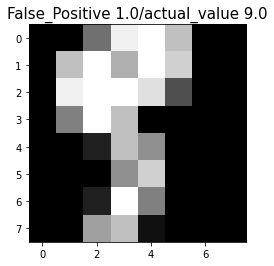

In [157]:
for id, val in enumerate(y_test):
    if(val != predictions[id]):
        print(X_test[id],"\n")
        plt.imshow(np.reshape(X_test[id],(8,8)),cmap= plt.cm.gray)
        plt.title('False_Positive '+ str(predictions[id]) +'/actual_value '+ str(y_test[id]),fontsize=15)
        plt.show()

In [158]:
pd.set_option('display.max_row', 100)
df_result

,real,predictions,success
0,9.0,9.0,True
1,9.0,9.0,True
2,1.0,1.0,True
3,9.0,9.0,True
4,9.0,9.0,True
5,9.0,9.0,True
6,9.0,9.0,True
7,1.0,1.0,True
8,9.0,9.0,True
9,9.0,9.0,True


In [163]:
# Check model params

log_reg_grid = LogisticRegression()
param_grid = {'penalty':['l1','l2'],
              'C': [1,2,3,4,5,10], # 'C' en clasificación cuanto más bajo, más margen/tolerancia se tiene en el modelo, puede haber mayor mezcla de clases en la frontera/divisioria entre ellas, y cuanto 'C'==> más alto más restrictivo es el modelo.
              'solver': ['liblinear']}


clf = GridSearchCV(log_reg_grid, param_grid = param_grid,
                    cv = 10, # Nuúmero de agrupaciones para realizar 'Cross_Validation'
                    verbose= True, #Muestra toda la información ==> información descriptiva
                    n_jobs= -1,
                    iid = 'False') 

In [164]:
best_clf = clf.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.1s finished


In [165]:
best_clf.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

In [166]:
best_clf.best_score_

1.0